In [1]:
import os
import sys

from PIL import Image
import numpy as np

from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def initialize_K_centroids(X, K):
    """ Choose K points from X at random """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]

In [3]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Find distances
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Assign closest cluster to c[i]
        c[i] = np.argmin(distances)

    return c

In [4]:
def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

In [5]:
def find_k_means(X, K, max_iters=10):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():
            # The centroids aren't moving anymore.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx

In [6]:
try:
    image_path = "/content/drive/MyDrive/Major/images/Lenna.png"
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Please specify an image')

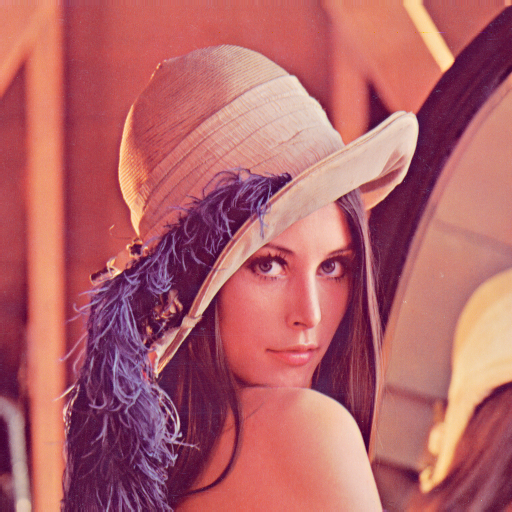

In [7]:
original_img = Image.open(image_path)
original_img

In [8]:
def load_image(path):
    """ Load image from path. Return a numpy array """
    image = original_img
    return np.asarray(image) / 255

In [9]:
image = load_image(original_img)
w, h, d = image.shape
print('Image found with width: {}, height: {}, depth: {}'.format(w, h, d))

Image found with width: 512, height: 512, depth: 3


In [10]:
X = image.reshape((w * h, d))
K = 20 # the desired number of colors in the compressed image

In [11]:
colors, _ = find_k_means(X, K, max_iters=20)

In [12]:
idx = find_closest_centroids(X, colors)

In [13]:
idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
compressed_image = Image.fromarray(X_reconstructed)

In [14]:
compressed_image.save('out.png')

In [15]:
oi = image_path
ci = "out.png"

In [16]:
ogimg = BytesIO()
original_img.save(ogimg, "png")
crimg = BytesIO()
compressed_image.save(crimg, "png")

os = ogimg.tell()
cs = crimg.tell()
cr = os/cs

In [17]:
print(os, cs, cr)

479778 129903 3.693355811644073


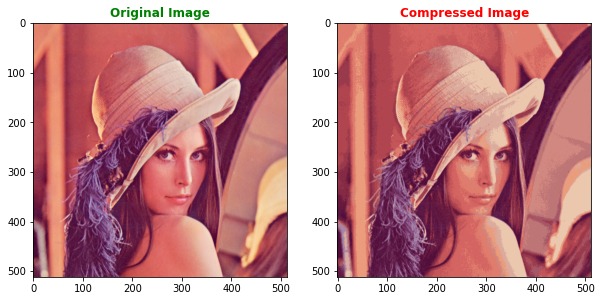

original image size
479778

compressed image size
129903

compression ratio
3.693355811644073


In [18]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(1, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

print("original image size")
print(os) 
print("\ncompressed image size")
print(cs)
print("\ncompression ratio")
print(cr)

In [19]:
im = Image.open(ci)

In [20]:
pixels = im.load()
width, height=im.size

In [21]:
key=[0]*(width*height)
all_pixels=[]
c=0
for y in range(height):
    for x in range(width):
        cpixel=pixels[x,y]
        all_pixels.append(cpixel)
        key[c]=0
        c=c+1
#for a in range(width*2):
#        print all_pixels[a]




for y in range(height-1):
    for x in range(width-2):
        if all_pixels[x+(width*y)]==0 and all_pixels[(x+1)+(width*y)]==0 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
        elif all_pixels[x+(width*y)]==0 and all_pixels[x+1+(width*y)]==0 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
        elif all_pixels[x+(width*y)]==0 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
        elif all_pixels[x+(width*y)]==0 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==0 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==0 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==0:
            if(all_pixels[(width*(y+1))+x+1])==255:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=0
        elif all_pixels[x+(width*y)]==255 and all_pixels[x+1+(width*y)]==255 and all_pixels[x+2+(width*y)]==255:
            if(all_pixels[(width*(y+1))+x+1])==0:
                key[(width*(y+1))+x+1]=1
            all_pixels[(width*(y+1))+x+1]=255
cnt=0    
for y in range(height):
    for x in range(width):
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1

In [22]:
pq = list()
pq=[0]*(int)(width/2)
print(pq)
keyrc=list()
#num=raw_input("How many elements should the Key have? (Key should contain only integers) ")
num=128
for i in range(0,int(num)):
    #n=raw_input()
    n=128
    keyrc.append(int(n))
print(keyrc)
lk=len(keyrc)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 

In [23]:
print("\nInitializing S")
s=list()
for i in range(width//2):
    s.append(int(i))
print(s)
print("Initialized")


Initializing S
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218

In [24]:
print("Shuffled")

print("\nShuffling S Again")
i=0
j=0
a=0
k=list()
while a<(width//2):
    i=(i+1)%(width//2)
    j=(j+s[i])%(width//2)
    temp=s[i]
    s[i]=s[j]
    s[j]=temp
    k.append(s[(s[i]+s[j])%(width//2)])
    pq[k[a]]=pq[k[a]]+1
    a=a+1
print(a)
print("k")
print(k)

Shuffled

Shuffling S Again
256
k
[2, 5, 7, 13, 13, 23, 31, 40, 40, 56, 50, 72, 86, 101, 117, 134, 130, 160, 180, 201, 223, 246, 87, 11, 118, 75, 103, 132, 162, 193, 225, 133, 60, 107, 37, 56, 126, 165, 205, 246, 64, 202, 70, 164, 210, 185, 34, 52, 15, 38, 179, 136, 238, 89, 182, 150, 208, 48, 119, 46, 146, 58, 124, 40, 148, 215, 26, 172, 39, 237, 185, 127, 229, 215, 18, 1, 33, 58, 18, 153, 196, 25, 197, 174, 16, 13, 36, 105, 115, 21, 35, 170, 81, 104, 214, 127, 137, 93, 104, 82, 102, 104, 6, 49, 150, 208, 229, 197, 82, 222, 112, 118, 86, 40, 89, 225, 77, 221, 96, 152, 129, 157, 27, 188, 253, 164, 99, 50, 130, 212, 109, 247, 77, 180, 56, 187, 27, 233, 149, 153, 148, 177, 147, 131, 33, 242, 32, 85, 96, 148, 230, 170, 43, 143, 43, 249, 133, 184, 139, 240, 161, 135, 248, 108, 73, 164, 128, 66, 173, 212, 3, 124, 197, 174, 48, 200, 169, 226, 91, 78, 95, 108, 124, 43, 115, 127, 86, 79, 38, 201, 239, 113, 43, 114, 41, 197, 183, 200, 7, 151, 15, 108, 193, 77, 35, 72, 146, 246, 158, 26, 125, 10

In [25]:
print("\nPQ")
print(pq)
s1=0
s2=0
for i in range(width//2):
    if pq[i]==0:
        s1=s1+1
    if pq[i]>1:
        s2=s2+1
print(s1)
print(s2)


PQ
[0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 3, 0, 2, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 4, 1, 0, 4, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 3, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 1, 0, 1, 0, 3, 1, 1, 0, 1, 2, 0, 1, 1, 3, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 4, 1, 0, 1, 3, 1, 0, 0, 1, 1, 2, 2, 0, 1, 3, 1, 0, 0, 1, 0, 3, 2, 1, 3, 1, 2, 2, 4, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 3, 2, 2, 1, 1, 3, 0, 1, 0, 3, 1, 0, 1, 1, 1, 0, 3, 1, 0, 0, 0, 2, 3, 1, 1, 1, 3, 0, 0, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 4, 1, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 4, 1, 1, 1, 0, 0, 0, 2, 0, 0]
90
64


In [26]:
i=0
while i<(width//2):
    j=0
    l=0
    if pq[i]==1 or pq[i]==0:
        i=i+1
        continue
    if pq[i]>1:
        z=i
        while pq[j]!=0:
            j=j+1
        while k[l]!=z:
            l=l+1
        k[l]=j
        pq[j]=pq[j]+1
        pq[i]=pq[i]-1
    j=0
    print(i)
    print(pq[j])
    print(pq[i])
    #print "i"
    #print i
print("pq")
print(pq)


print("k")
print(k)

7
1
1
13
1
2
13
1
1
15
1
1
18
1
1
26
1
1
27
1
1
33
1
1
35
1
1
38
1
1
39
1
1
40
1
3
40
1
2
40
1
1
43
1
3
43
1
2
43
1
1
48
1
1
50
1
1
56
1
2
56
1
1
58
1
1
66
1
1
72
1
1
77
1
2
77
1
1
82
1
1
86
1
2
86
1
1
89
1
1
96
1
1
102
1
1
104
1
3
104
1
2
104
1
1
108
1
2
108
1
1
114
1
1
115
1
1
118
1
2
118
1
1
124
1
2
124
1
1
125
1
1
127
1
2
127
1
1
129
1
1
130
1
1
131
1
3
131
1
2
131
1
1
132
1
1
133
1
1
137
1
1
143
1
1
146
1
1
147
1
1
148
1
2
148
1
1
149
1
1
150
1
1
153
1
2
153
1
1
157
1
2
157
1
1
164
1
2
164
1
1
169
1
1
170
1
2
170
1
1
174
1
2
174
1
1
177
1
1
180
1
1
185
1
1
193
1
1
197
1
3
197
1
2
197
1
1
200
1
1
201
1
1
208
1
1
212
1
1
215
1
1
225
1
1
229
1
1
246
1
3
246
1
2
246
1
1
253
1
1
pq
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
for x in range(width//2):
    for y in range(height):
        t=all_pixels[x+(y*width)]
        all_pixels[x+(y*width)]=all_pixels[k[x]+(y*width)+(width//2)]
        all_pixels[k[x]+(y*width)+(width//2)]=t
cnt=0    
for y in range(height):
    for x in range(width):
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1
im.save("lenna_kmeans_rc4_encrypt.png")
ei = "lenna_kmeans_rc4_encrypt.png"
# im.save('/content/drive/MyDrive/images/encrypted/mandril_encrypt.png') 

In [28]:
for x in range(width//2):
    for y in range(height):
        t=all_pixels[x+(y*width)]
        all_pixels[x+(y*width)]=all_pixels[k[x]+(y*width)+(width//2)]
        all_pixels[k[x]+(y*width)+(width//2)]=t
cnt=0    

cnt=0    
for y in range(height):
    for x in range(width):
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1
im.save("lenna_kmeans_rc4_decrypt.png")
di = "lenna_kmeans_rc4_decrypt.png"
#im.save('/content/drive/MyDrive/images/encrypted/mandril_decrypt.png') 

In [29]:
cnt=0
for y in range(height):
    for x in range(width):
        if key[(width*(y))+x]==1:
            if all_pixels[(width*(y))+x]==0:
                all_pixels[(width*(y))+x]=255
            else:
                all_pixels[(width*(y))+x]=0
        pixels[x,y]=all_pixels[cnt]
        cnt=cnt+1
#im.save('/content/drive/MyDrive/images/encrypted/imagedecrypt.png')

In [30]:
from PIL import Image
import math
# Same as NPCR both are used for sensitivity analysis two encrypted image is required



# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
uloc1 = ei
uloc2 = oi
def uaci(loc1,loc2):
    image1 = Image.open(loc1)
    image2 = Image.open(loc2)
    pixel1=image1.load()
    pixel2=image2.load()
    width,height=image1.size
    value=0.0
    for y in range(0,height):
        for x in range(0,width):
            value=(abs(pixel1[x,y][0]-pixel2[x,y][0])/255)+value

    value=(value/(width*height))*100
    return value
print("UACI")
print(uaci(uloc1,uloc2))

#decrypted image and original image

UACI
21.621008480313467


In [31]:
  # It has a NPCR(Number of pixel changed rate).It compares the pixel values of the original image and the encrypted image.
  # The resultant value is returned in percentage.If the value is more than 99% then the analysis is positive.
    
   # It consist of three modules rateofchange(),sumofpixel(),npcrv().




from PIL import Image
import numpy as np


 #   This method compares two image.If the pixel value is same then 0 is stored in the matrix else one is stored
# loc1="/content/drive/MyDrive/images/encrypted/imagedecrypt.png"
# loc2="/content/drive/MyDrive/images/Lenna.png"
loc1 = di
loc2 = oi
def rateofchange(height,width,pixel1,pixel2,matrix,i):

    for y in range(0,height):
        for x in range(0,width):
            #print(x,y)
            if pixel1[x,y][i] == pixel2[x,y][i]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    return matrix
"""
    sum of the values of 1 stored in matrix is calculated
"""
def sumofpixel(height,width,pixel1,pixel2,ematrix,i):
    matrix=rateofchange(height,width,pixel1,pixel2,ematrix,i)
    psum=0
    for y in range(0,height):
        for x in range(0,width):
            psum=matrix[x,y]+psum
    return psum

"""
Finally the above two module is called to calculate the values
"""
def npcrv(loc1,loc2):
    c1 = Image.open(loc1)
    c2 = Image.open(loc2)
    width, height = c1.size
    pixel1 = c1.load()
    pixel2 = c2.load()
    ematrix = np.empty([width, height])
    per=(((sumofpixel(height,width,pixel1,pixel2,ematrix,0)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,1)/(height*width))*100)+((sumofpixel(height,width,pixel1,pixel2,ematrix,2)/(height*width))*100))/3
    return per
print("NPCR")
print(npcrv(loc1,loc2))

NPCR
94.6367899576823


In [32]:
#calculating size of encrypted and decrypted files
encrypted_img = Image.open(ei)
decrypted_img = Image.open(di)
enimg = BytesIO()
encrypted_img.save(enimg, "png")
deimg = BytesIO()
decrypted_img.save(deimg, "png")
es = enimg.tell()
ds = deimg.tell()

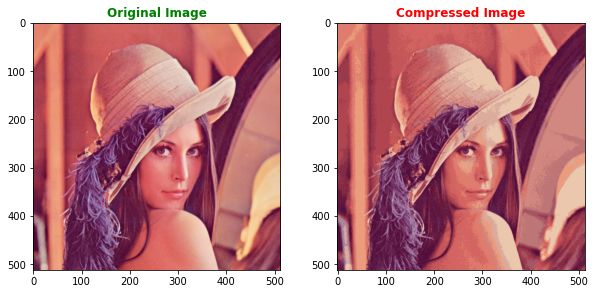

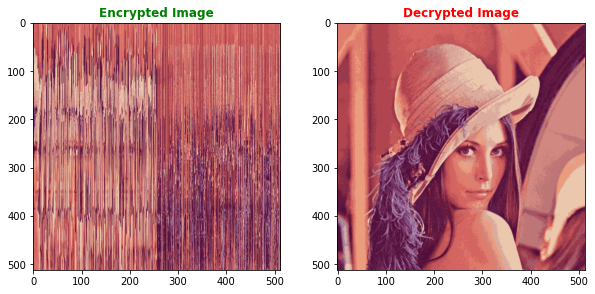

original image size
479778

compressed image size
129903

encrypted image size
156703

decrypted image size
129903

compression ratio
3.693355811644073

UACI
21.621008480313467

NPCR
94.6367899576823


In [33]:
fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(oi)
fig.add_subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image", color='green', fontweight="bold")

img = mpimg.imread(ci)
fig.add_subplot(2, 2, 2)
plt.imshow(img)
plt.title("Compressed Image", color='red', fontweight="bold")
plt.show()

fig=plt.figure(figsize=(10, 10))

img = mpimg.imread(ei)
fig.add_subplot(2, 2, 3)
plt.imshow(img)
plt.title("Encrypted Image", color='green', fontweight="bold")

img = mpimg.imread(di)
fig.add_subplot(2, 2, 4)
plt.imshow(img)
plt.title("Decrypted Image", color='red', fontweight="bold")
plt.show()

print("original image size")
print(os) 
print("\ncompressed image size")
print(cs)
print("\nencrypted image size")
print(es) 
print("\ndecrypted image size")
print(ds)
print("\ncompression ratio")
print(cr)
print("\nUACI")
print(uaci(uloc1,uloc2))
print("\nNPCR")
print(npcrv(loc1,loc2))